In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
sales = pd.read_csv('home_data.csv')
print(len(sales))
sales.head()

21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Create a simple regression model of sqft_living to price

In [3]:
np.random.seed(1)
msk = np.random.rand(len(sales)) < 0.8
sales_train = sales[msk]
sales_test = sales[~msk]

In [4]:
sqft_model = linear_model.LinearRegression()
sqft_model.fit(sales_train[['sqft_living']], sales_train['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the simple model

In [5]:
print(sales_test['price'].mean())

538572.006701


In [6]:
predictions = sqft_model.predict(sales_test[['sqft_living']])

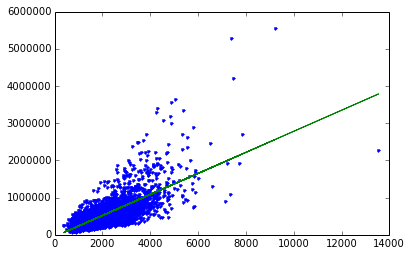

In [7]:
plt.plot(sales_test['sqft_living'],sales_test['price'],'.',
        sales_test['sqft_living'],predictions,'-')

In [8]:
sqft_model.coef_

array([ 283.11172767])

In [9]:
rss = np.mean((predictions - sales_test['price']) ** 2)
print("Residual sum of squares: %.2f" % rss)
math.sqrt(rss)

Residual sum of squares: 68915991400.72


262518.55439324403

## Explore other features in the data

In [10]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
sales[my_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1,98178
1,3,2.25,2570,7242,2,98125
2,2,1.00,770,10000,1,98028
3,4,3.00,1960,5000,1,98136
4,3,2.00,1680,8080,1,98074


## Build a regression model with more features

In [11]:
my_features_model = linear_model.LinearRegression(normalize=True)
my_features_model.fit(sales_train[my_features], sales_train['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

## Comparing the results of the simple model with adding more features

In [12]:
predictions2 = my_features_model.predict(sales_test[my_features])

In [13]:
print(my_features_model.coef_)

[ -5.63718795e+04   5.78515450e+03   3.21162714e+02  -2.93200021e-01
   1.34912400e+03   5.65613118e+02]


In [14]:
rss2 = np.mean((predictions2 - sales_test['price']) ** 2)
print("Residual sum of squares: %.2f" % rss2)
math.sqrt(rss2)

Residual sum of squares: 65918923674.64


256746.80849941872

This model is not much better than the simple model. I suspect 'graphlab.linear_regression.create' is doing something extra.

## Apply learned models to predict prices of 3 houses

In [15]:
house1 = sales[sales.id==5309101200]
print(int(house1['price']))
print(sqft_model.predict(house1[['sqft_living']]))
print(my_features_model.predict(house1[my_features]))

620000
[ 631416.12862811]
[ 633929.42526011]


In [16]:
house2 = sales[sales.id==1925069082]
print(int(house2['price']))
print(sqft_model.predict(house2[['sqft_living']]))
print(my_features_model.predict(house2[my_features]))

2200000
[ 1265586.39859895]
[ 1267354.1445647]


In [17]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}
house3 = pd.DataFrame(bill_gates)
print(sqft_model.predict(house3[['sqft_living']]))
print(my_features_model.predict(house3[my_features]))

[ 14107534.36550848]
[ 15722252.98378176]
